# Thinkful Capstone Analytics Project 


#### Business Question 1: Why are good employees people leaving their jobs? 


#### Business Question 2: When do good, loyal employees tend to leave? Why? 


#### Business Question 3: How do we optimize conditions to reduce turnover. Are our incentives to keep high performing employees working? 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
from scipy.stats import ttest_ind
import scipy.stats
%matplotlib inline

/Users/fnkyazn/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Previewing Data

In [2]:
#read in .csv
df = pd.read_csv('HR_comma_sep.csv')

#preview first 5 rows of data frame
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
#Column assignment coventions taken from Randy Lao on Kaggle

df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
df.shape

(14999, 10)

In [5]:
turnover = df.turnover.value_counts()/14999

In [6]:
turnover_summary = df.groupby('turnover')
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### What portion of employees are leaving? 

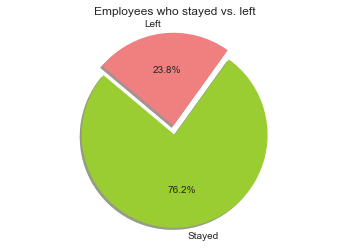

In [7]:
turnover

plt.title("Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [11428,3571]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()


In [8]:
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

### Distribution of satisfaction

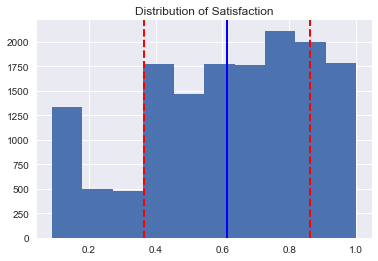

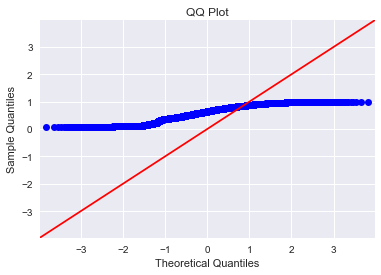

In [9]:
satisfaction = df['satisfaction']

plt.title('Distribution of Satisfaction')
#Plot distribution of attribute
plt.hist(satisfaction)

#Create solid line at mean
plt.axvline(satisfaction.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(satisfaction.mean()-satisfaction.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(satisfaction.mean()+satisfaction.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(satisfaction,line='45')
plt.title('QQ Plot')
pylab.show()

### Distribution of projectCount

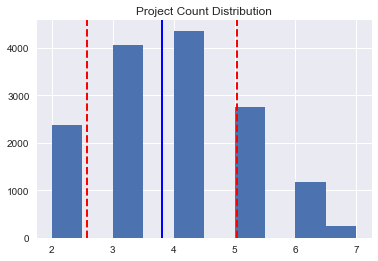

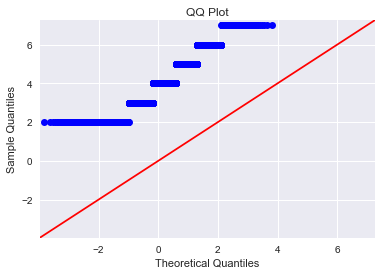

In [10]:
projectCount = df['projectCount']

plt.title('Project Count Distribution')

#Plot distribution of attribute
plt.hist(projectCount)

#Create solid line at mean
plt.axvline(projectCount.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(projectCount.mean()-projectCount.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(projectCount.mean()+projectCount.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(projectCount,line='45')
plt.title('QQ Plot')
pylab.show()

### Distribution of Average Monthly Hours

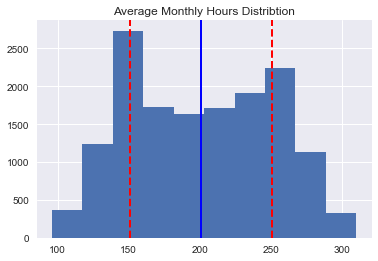

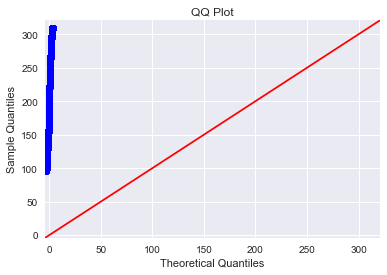

In [11]:
averageMonthlyHours = df['averageMonthlyHours']

plt.title('Average Monthly Hours Distribtion')

#Plot distribution of attribute
plt.hist(averageMonthlyHours)

#Create solid line at mean
plt.axvline(averageMonthlyHours.mean(),color='b',linestyle='solid',linewidth=2)

#Create dotted line 1 st dev below mean
plt.axvline(averageMonthlyHours.mean()-averageMonthlyHours.std(),color='r',linestyle='dashed',linewidth=2)

#Create dotted line 1 st dev above mean
plt.axvline(averageMonthlyHours.mean()+averageMonthlyHours.std(),color='r',linestyle='dashed',linewidth=2)

#Show plot
plt.show()

sm.qqplot(averageMonthlyHours,line='45')
plt.title('QQ Plot')
pylab.show()

## BQ1: Why are good employees leaving their jobs?

### Correlation matrix overlooking all data

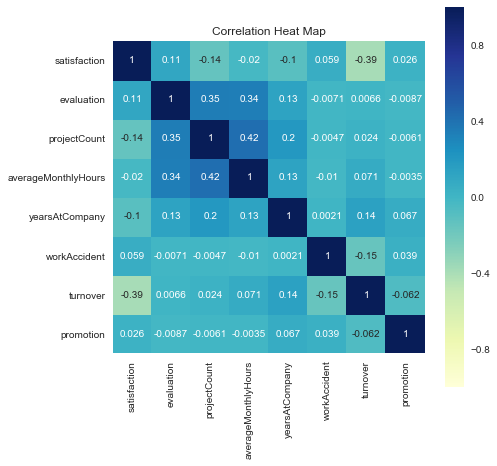

In [12]:
correlation = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')


### Assessing good employees -- what differences in behavior are there between those who stay and those who leave? 


In [45]:
good_employees = df[df['evaluation'] > .7]

#plt.figure(figsize=(7,7))
#correlation = good_employees.corr()
#sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
#plt.title('Correlation Heat Map')

In [14]:
good_employees.turnover.value_counts()

0    5901
1    1901
Name: turnover, dtype: int64

### Good Employee Turnover: Pie chart summary

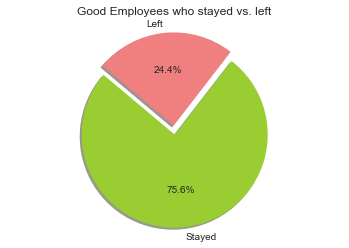

In [15]:
turnover

plt.title("Good Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [5901,1901]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

In [17]:
good_employees_left = good_employees[good_employees['turnover'] == 1]
good_employees_stayed = good_employees[good_employees['turnover'] == 0]

### Good Employee Turnover: Differences in satisfaction

(-0.34145072868698284, 2.8696382574929443e-212)


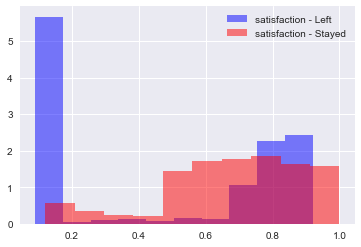

In [18]:
plt.hist(good_employees_left['satisfaction'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(good_employees_stayed['satisfaction'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

print(scipy.stats.pearsonr(good_employees['satisfaction'],good_employees['turnover']))

### Good Employee Turnover: Statistical signifiances in satisfaction diff. between those who stayed/left

In [19]:
ttest_ind(good_employees_stayed['satisfaction'],good_employees_left['satisfaction'])

Ttest_indResult(statistic=32.08439434780577, pvalue=2.8696382574868446e-212)

### Good Employee Turnover: Time committed to work

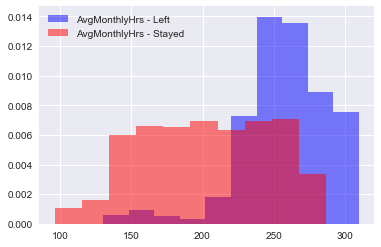

In [22]:
plt.hist(good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='AvgMonthlyHrs - Left',normed=True)
plt.hist(good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='AvgMonthlyHrs - Stayed',normed=True)
plt.legend()

### Good Employee Turnover: Statistical significance in time commitment diff. between those who stayed/left

In [23]:
ttest_ind(good_employees_stayed['averageMonthlyHours'],good_employees_left['averageMonthlyHours'])

Ttest_indResult(statistic=-49.254781558929452, pvalue=0.0)

In [54]:
#ax = sns.countplot(x='projectCount',hue='turnover',data=good_employees)

### Good Employee Turnover: Project commitments

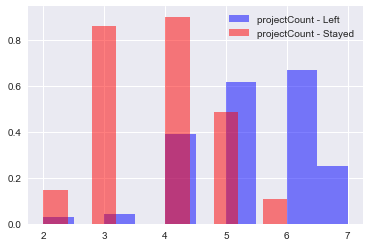

In [24]:
plt.hist(good_employees_left['projectCount'],alpha=.5,color='blue',label='projectCount - Left',normed=True)
plt.hist(good_employees_stayed['projectCount'],alpha=.5,color='red',label='projectCount - Stayed',normed=True)
plt.legend()

### Good Employee Turnover: Statistically significant diff. in project commitment between those who stayed/left

In [51]:
#sns.lmplot(x='projectCount',y='turnover',data=good_employees)
print(scipy.stats.pearsonr(good_employees['projectCount'],good_employees['turnover']))

(0.54097413566527808, 0.0)


In [55]:
#sns.lmplot(x='averageMonthlyHours',y='turnover',data=good_employees)
#print(scipy.stats.pearsonr(good_employees['averageMonthlyHours'],good_employees['turnover']))

In [56]:
#ttest_ind(good_employees_stayed['projectCount'],good_employees_left['projectCount'])

In [57]:
good_employees = df[df['evaluation'] > .7]

satisfied_good_employees = good_employees[good_employees['satisfaction'] > .7]

#correlation = satisfied_good_employees.corr()
#plt.figure(figsize=(7,7))
#sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
#plt.title('Correlation Heat Map')

In [58]:
satisfied_good_employees_left = satisfied_good_employees[satisfied_good_employees['turnover'] == 1]
satisfied_good_employees_stayed = satisfied_good_employees[satisfied_good_employees['turnover'] == 0]

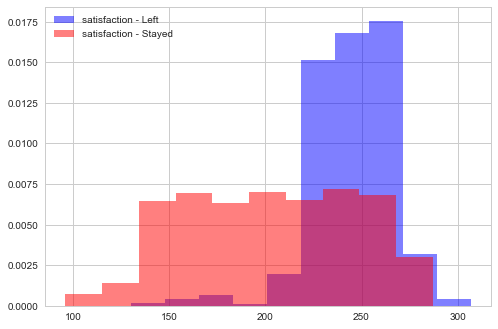

In [59]:
plt.hist(satisfied_good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

In [52]:
#sns.lmplot(x='averageMonthlyHours',y='turnover',data=satisfied_good_employees)
print(scipy.stats.pearsonr(satisfied_good_employees['averageMonthlyHours'],satisfied_good_employees['turnover']))

(0.41140883250107169, 1.4223259674803419e-156)


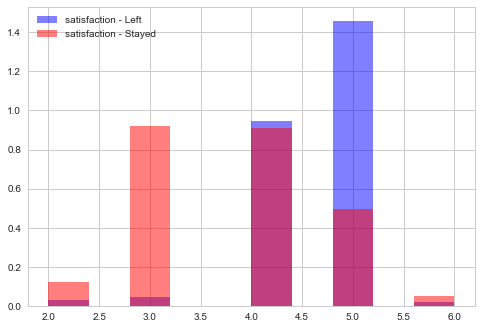

In [60]:
plt.hist(satisfied_good_employees_left['projectCount'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_employees_stayed['projectCount'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

In [53]:
#sns.lmplot(x='projectCount',y='turnover',data=satisfied_good_employees)
print(scipy.stats.pearsonr(satisfied_good_employees['projectCount'],satisfied_good_employees['turnover']))

(0.37098732539938145, 1.9742287562464757e-125)


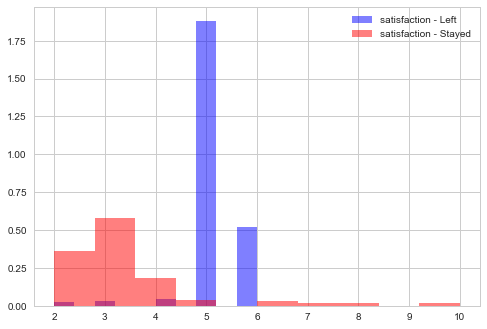

In [32]:
plt.hist(satisfied_good_employees_left['yearsAtCompany'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_employees_stayed['yearsAtCompany'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

In [61]:
satisfied_good_veteran = satisfied_good_employees[satisfied_good_employees['yearsAtCompany'] > 4]

satisfied_good_veteran_left = satisfied_good_veteran[satisfied_good_veteran['turnover'] == 1]
satisfied_good_veteran_stayed = satisfied_good_veteran[satisfied_good_veteran['turnover'] == 0]

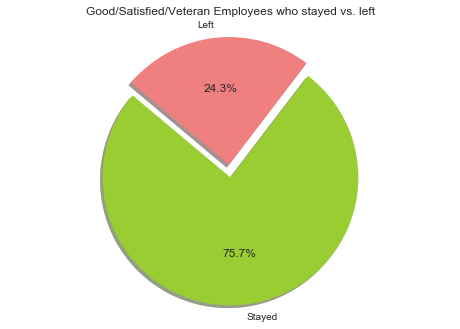

In [34]:
plt.title("Good/Satisfied/Veteran Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [865,277]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

In [35]:
satisfied_good_veteran.turnover.value_counts()

1    865
0    277
Name: turnover, dtype: int64

(0.39231053180178649, 2.5459658791025137e-43)


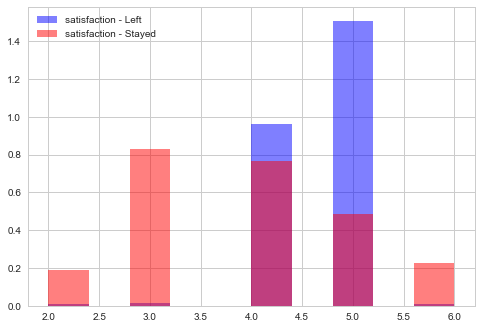

In [64]:
plt.hist(satisfied_good_veteran_left['projectCount'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_veteran_stayed['projectCount'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

print(scipy.stats.pearsonr(satisfied_good_veteran['projectCount'],satisfied_good_veteran['turnover']))

(0.5565888912338901, 7.0128958724015061e-94)


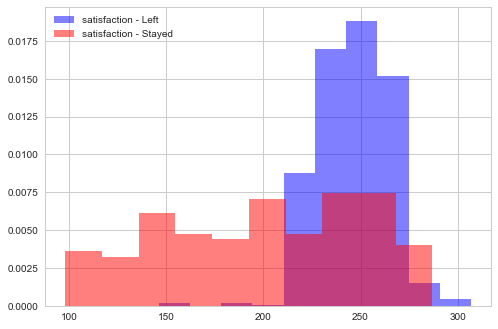

In [66]:
plt.hist(satisfied_good_veteran_left['averageMonthlyHours'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(satisfied_good_veteran_stayed['averageMonthlyHours'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

print(scipy.stats.pearsonr(satisfied_good_veteran['averageMonthlyHours'],satisfied_good_veteran['turnover']))

In [38]:
satisfied_good_veteran_left.salary.value_counts()

low       524
medium    329
high       12
Name: salary, dtype: int64

plt.title("Salary Distribution - Good Veterans who Left")
labels = 'Low', 'Medium', 'High'
sizes = [524,329,12]
colors = ['yellowgreen','lightcoral','yellow']
explode = [0,0,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

In [40]:
satisfied_good_veteran_stayed.salary.value_counts()

medium    158
low        86
high       33
Name: salary, dtype: int64

plt.title("Salary Distribution - Good Veterans who Stayed")
labels = 'Low', 'Medium', 'High'
sizes = [158,86,33]
colors = ['yellowgreen','lightcoral','yellow']
explode = [0,0,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x="department", data=satisfied_good_veteran_stayed,order=["hr","technical","sales","support","product_mng","randD","accounting","IT","management","marketing"], palette="Greens_d");

plt.figure(figsize=(10,5))
sns.countplot(x="department", data=satisfied_good_veteran_left,order=["hr","technical","sales","support","product_mng","randD","accounting","IT","management","marketing"], palette="Greens_d");

In [ ]:
satisfied_good_employees.turnover.value_counts()

In [ ]:
turnover

plt.title("Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [2933,902]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

## Why are good, unsatisfied employees leaving? 

### Key factors remain --> much stronger relationship with turnover. Overall satisfaction also strongly tied to turnover rate.

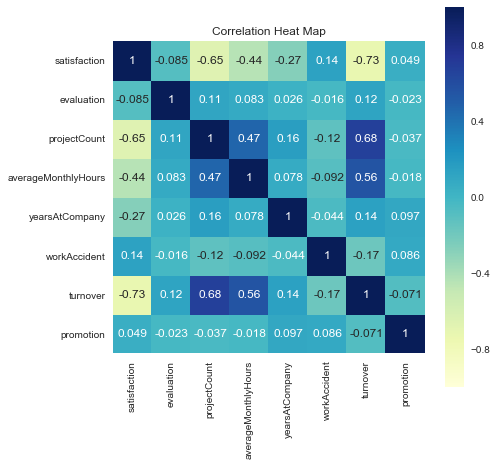

In [67]:
unhappy_good_employees = df[df['evaluation'] > .7]
unhappy_good_employees1 = unhappy_good_employees[unhappy_good_employees['satisfaction'] < .7]

                            
correlation = unhappy_good_employees1.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')

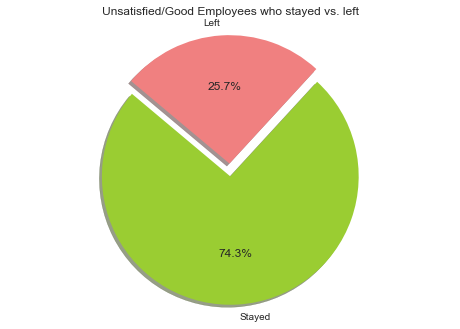

In [68]:
turnover

plt.title("Unsatisfied/Good Employees who stayed vs. left")
labels = 'Stayed', 'Left'
sizes = [2865,992]
colors = ['yellowgreen','lightcoral']
explode = [0.1,0]

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=True,startangle=140)

plt.axis('equal')
plt.show()

In [69]:
unhappy_good_employees1.turnover.value_counts()

0    2865
1     992
Name: turnover, dtype: int64

In [70]:
unhappy_good_employees_left = unhappy_good_employees1[unhappy_good_employees1['turnover'] == 1]
unhappy_good_employees_stayed = unhappy_good_employees1[unhappy_good_employees1['turnover'] == 0]

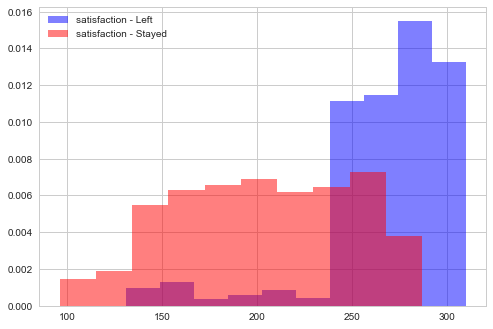

In [71]:
plt.hist(unhappy_good_employees_left['averageMonthlyHours'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(unhappy_good_employees_stayed['averageMonthlyHours'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

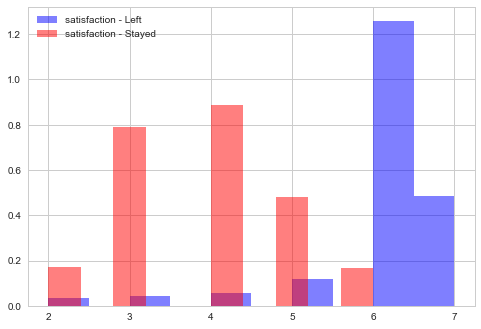

In [72]:
plt.hist(unhappy_good_employees_left['projectCount'],alpha=.5,color='blue',label='satisfaction - Left',normed=True)
plt.hist(unhappy_good_employees_stayed['projectCount'],alpha=.5,color='red',label='satisfaction - Stayed',normed=True)
plt.legend()

## BQ2: At what point in their tenure do good employees tend to leave? 

### Overlooking all employees, there's a spike at 3 years that tapers off gradually until year 6

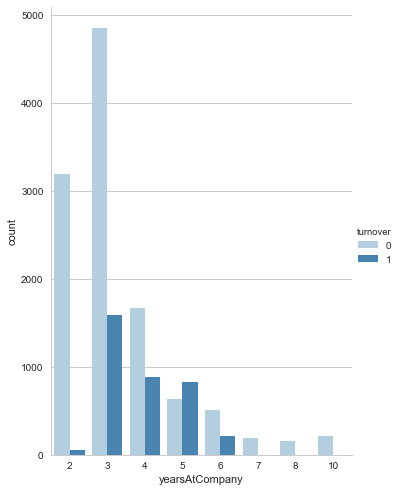

In [74]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=df,kind="count",size=7,aspect=.7,palette="Blues")


## Highly evaluated employees tend to be retained longer -- until years 4/5

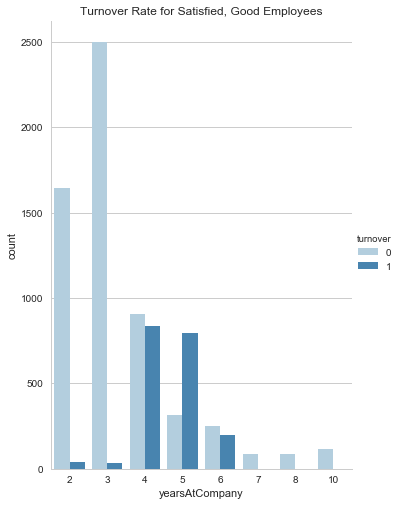

In [77]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=good_employees,kind="count",size=7,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Satisfied, Good Employees")


## Highly evaluated employees who are also highly satisfied tend to stay even longer -- turnover doesn't spike until year 5

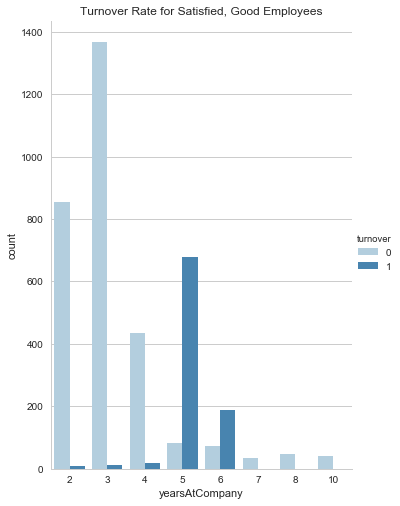

In [78]:
sns.factorplot(x="yearsAtCompany",hue="turnover",data=satisfied_good_employees,kind="count",size=7,aspect=.7,palette="Blues")
plt.title("Turnover Rate for Satisfied, Good Employees")


## Looking at good, satisfied, veteran (>4 years) employees -- why are they leaving (how do we explain the spike?

### Same factors remain prominent -- those who are overworked tend to leave. 

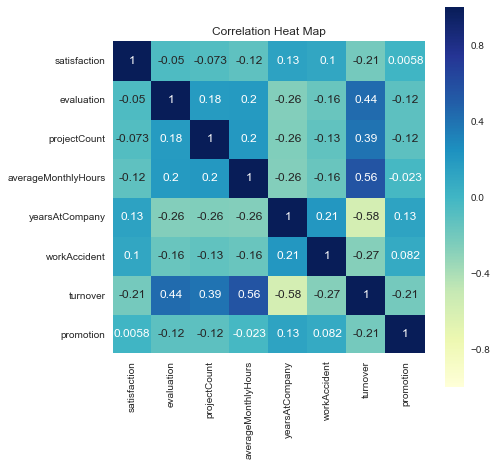

In [79]:
satisfied_good_veteran_employees = satisfied_good_employees[satisfied_good_employees['yearsAtCompany'] > 4]

correlation = satisfied_good_veteran_employees.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap="YlGnBu")
plt.title('Correlation Heat Map')
                                                            
                                                            

# BQ3: How do we optimize conditions to reduce turnover. Are our incentives to keep high performing employees working? 
## Project Counts
### Highest satisfaction levels maintained at work loads of 3 - 5 projects

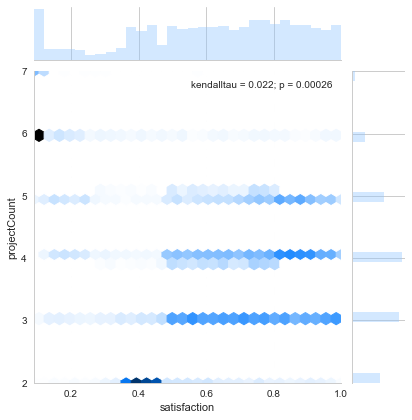

In [80]:
sns.jointplot(x='satisfaction',y='projectCount',data=df,kind="hex",stat_func=kendalltau,color="b")

## Time spent on the job
### Highest satisfaction levels maintained between 170 - 250 average monthly hours

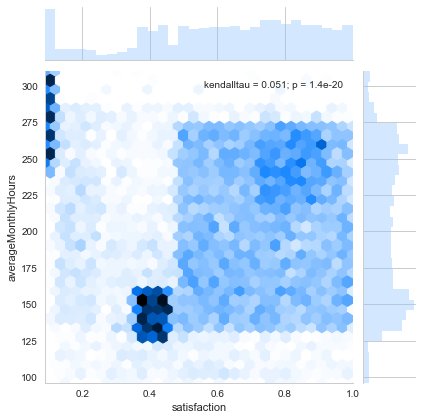

In [81]:
sns.jointplot(x='satisfaction',y='averageMonthlyHours',data=df,kind="hex",stat_func=kendalltau,color="b")

## A look at promotions

### Very few who are promoted leave the company

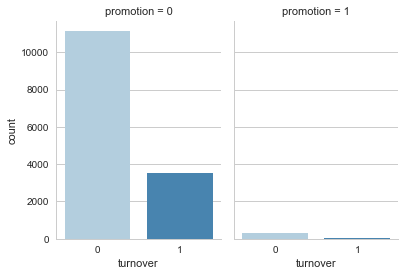

In [82]:
g = sns.factorplot(x="turnover",col="promotion",data=df,kind="count",size=4,aspect=.7,palette="Blues")


## A look at wages

### Retention is highest in those who receive high wages

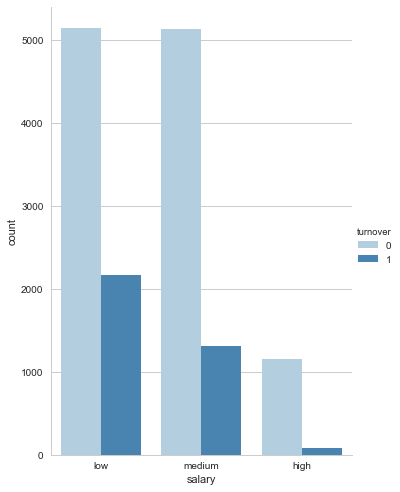

In [83]:
g = sns.factorplot(x="salary",hue="turnover",data=df,kind="count",size=7,aspect=.7,palette="Blues")
